# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.28 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

import torch
import pandas as pd
from collections import deque
import random
import matplotlib.pyplot as plt
%matplotlib inline

from workspace_utils import active_session


In [3]:
from ddpg_agent import Agent

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [4]:
with active_session():
    def ddpg(n_episodes=1000, max_t=1000, print_every=10):
        scores_deque = deque(maxlen=100)
        scores = []
        time_stamp = 0
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]          
            states = env_info.vector_observations               
            agent.reset()
            score = np.zeros(num_agents)
        
            for t in range(max_t):
                actions = agent.act(states)
                env_info = env.step(actions)[brain_name]           # send all actions to the environment
                next_states = env_info.vector_observations         # get next state (for each agent)
                rewards = env_info.rewards                         # get reward (for each agent)
                dones = env_info.local_done                        # see if episode finished
            
                for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                    agent.step(state, action, reward, next_state, done, time_stamp)
                
                states = next_states
                score += rewards
                time_stamp += 1
                if np.any(dones):
                    break 
        
            scores_deque.append(np.mean(score))
            scores.append(np.mean(score))
        
            if i_episode % print_every == 0:
                print('\rEpisode {}   Average Score: {:.2f}'.format(i_episode,  np.mean(scores_deque)))
            if np.mean(scores_deque) >= 30:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), 'actor_checkpoint.pth')
                torch.save(agent.critic_local.state_dict(), 'critic_checkpoint.pth')
                break
        return scores

    agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)


    scores = ddpg()

Using:  cuda:0
Episode 10   Average Score: 2.85
Episode 20   Average Score: 5.84
Episode 30   Average Score: 8.45
Episode 40   Average Score: 11.26
Episode 50   Average Score: 14.72
Episode 60   Average Score: 18.43
Episode 70   Average Score: 21.26
Episode 80   Average Score: 23.47
Episode 90   Average Score: 25.15


KeyboardInterrupt: 

NameError: name 'scores' is not defined

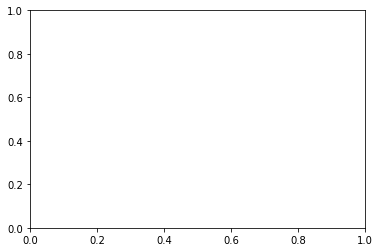

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

NameError: name 'scores' is not defined

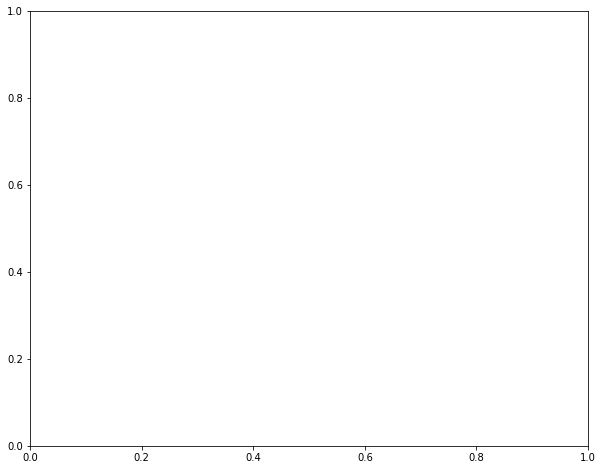

In [6]:
# plot the scores
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.title('Score (Rewards)')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("scores_plot.jpg")
plt.show()

In [7]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint_actor.pth'